In [1]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from collections import Counter
from glob import iglob
from wordcloud import WordCloud
from nltk import word_tokenize, pos_tag, ne_chunk
import nltk
import os
import re
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#### Data: https://archive.ics.uci.edu/ml/datasets/Health+News+in+Twitter
folderpath = 'Health-Tweets'

In [3]:
def remove_garbage(text):

    """Replace non-word (non-alphanumeric) chars in text with spaces,
       Remove numbers, hyperlinks
       then convert and return a lowercase version of the result.
    """
    url_reg  = r'[a-z]*[:.]+\S+'
    text = re.sub(url_reg, '', text)
    
    text = re.sub(r'\W+', ' ', text)
    
    text = re.sub(" \d+", " ", text)
    text = text.lower()
    return text

In [4]:
def remove_words(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]

In [5]:
def remove_short_words(wordlist):
    return [w for w in wordlist if len(w) > 3]

In [6]:
def draw_wordcloud(freq_dict):
    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_words=50, max_font_size=110)
    wordcloud.generate_from_frequencies(freq_dict)
    # Display the generated image:
    # the matplotlib way:
    
    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    return 0

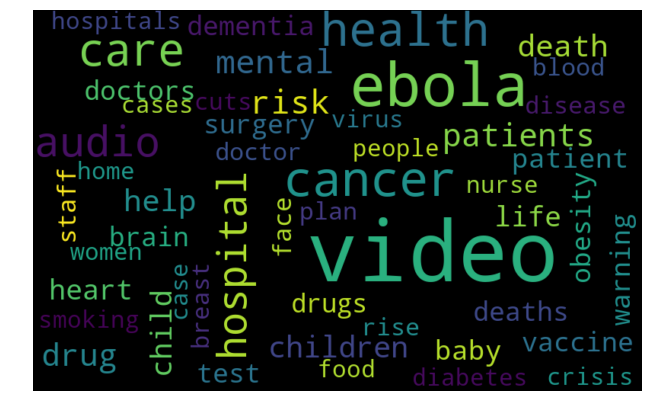

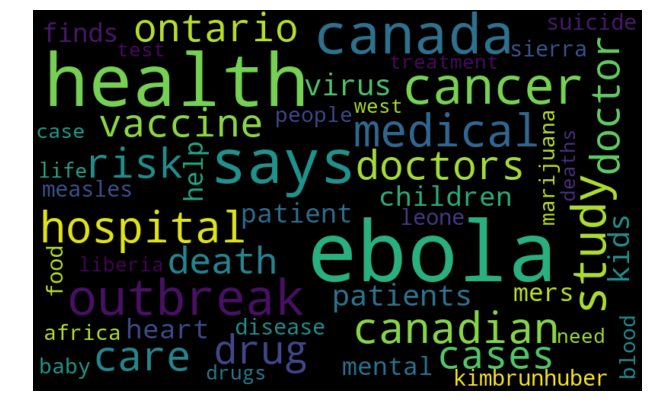

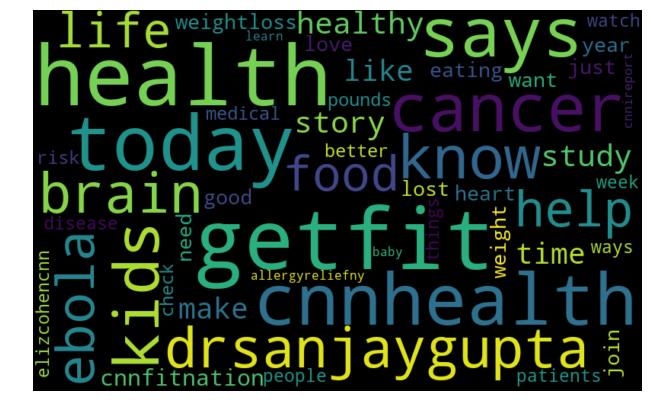

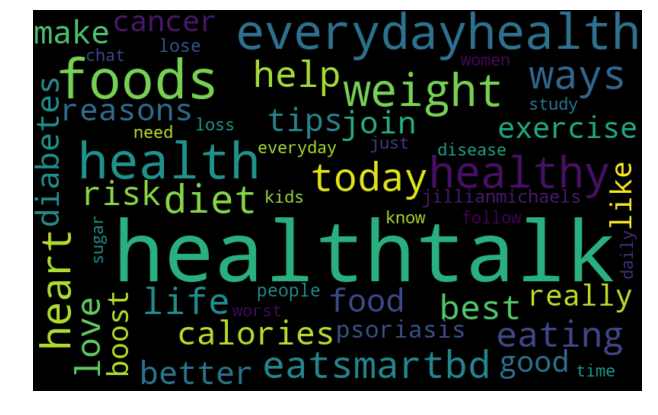

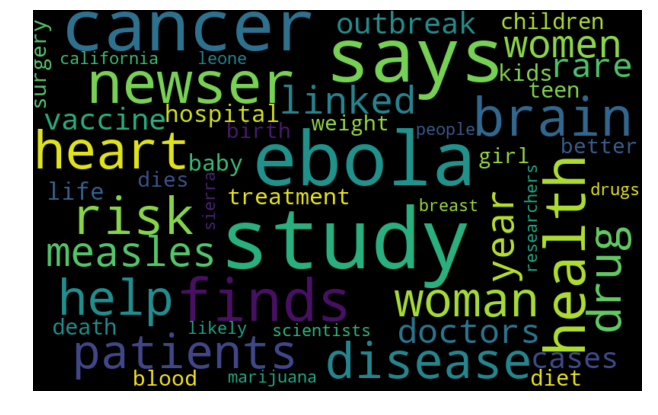

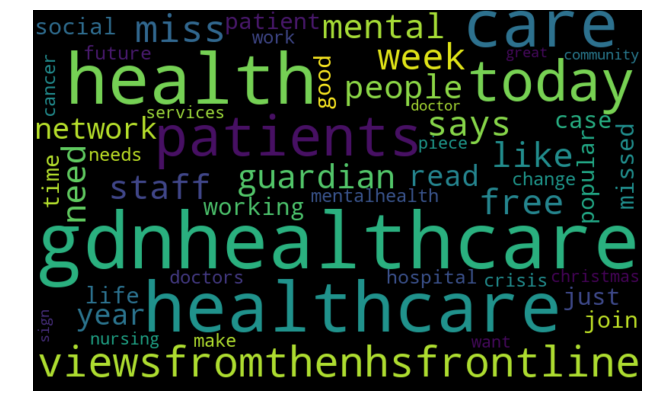

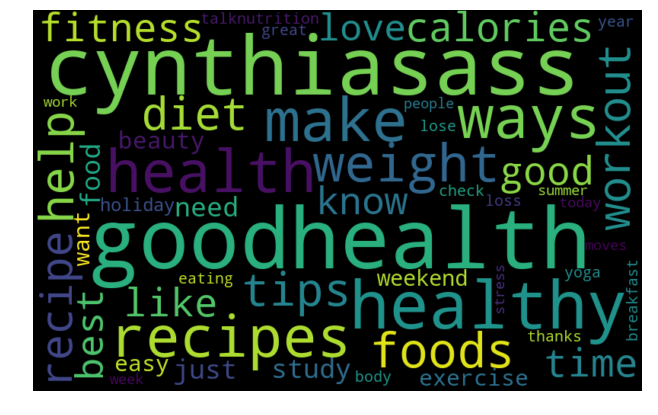

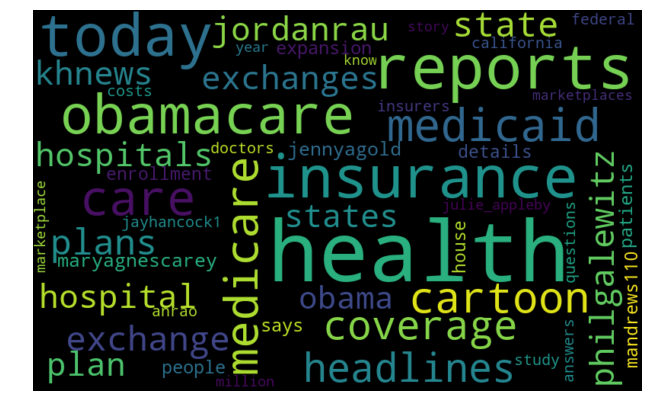

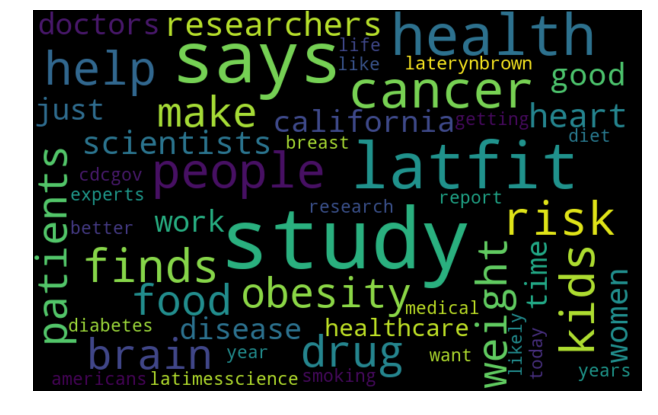

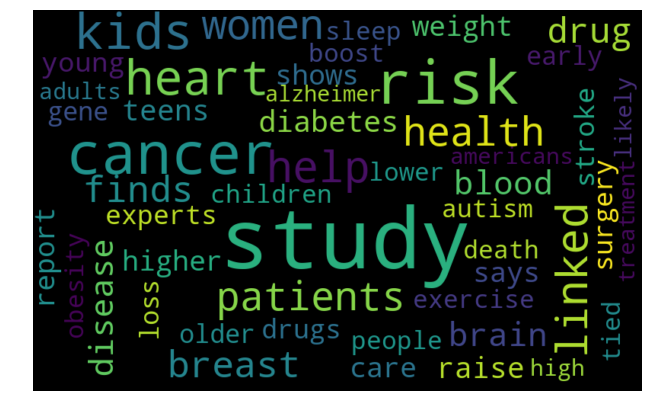

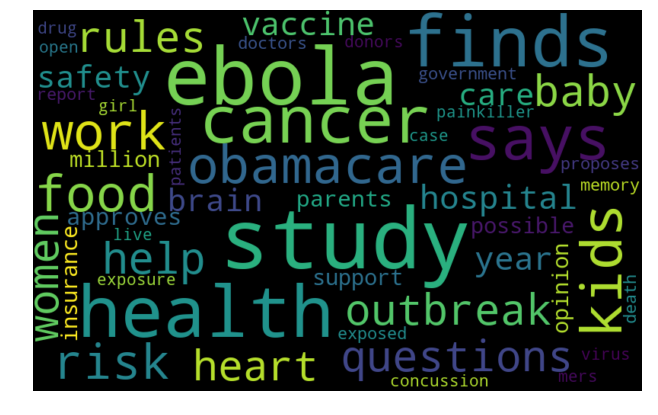

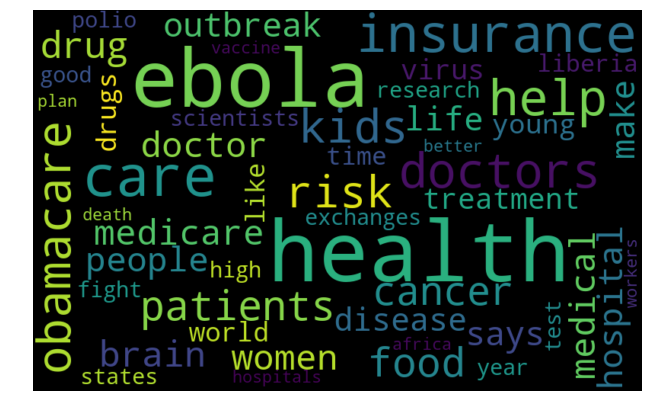

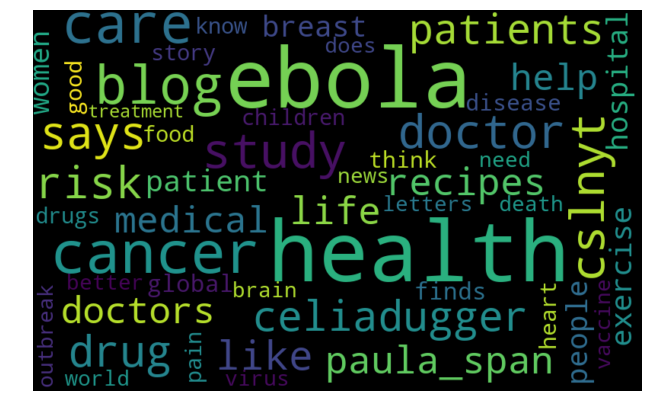

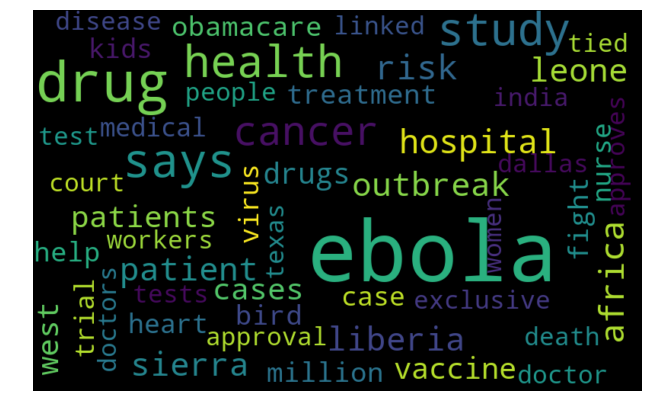

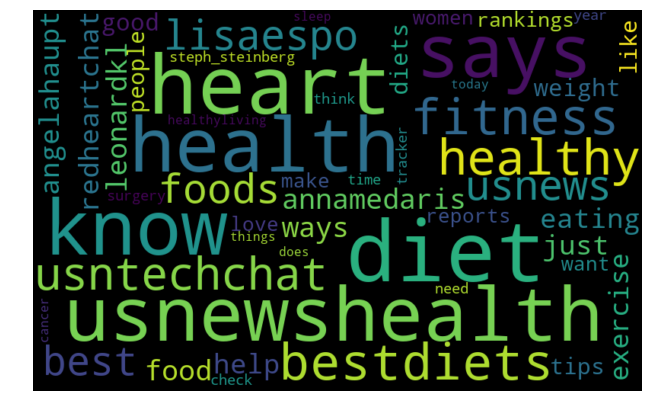

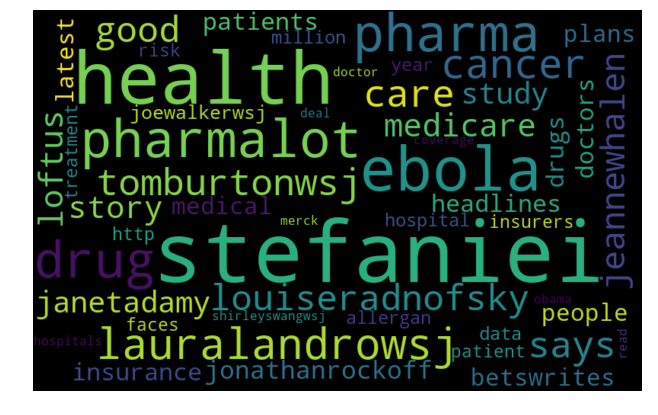

In [7]:
for idx, filepath in enumerate(iglob(os.path.join(folderpath, '*.txt'))):
    ugrms_cnter = Counter()
    fo = open(filepath)
    fo1 = fo.readlines()

    for line in fo1:
        line = line.split("|")[-1]
        fil_words = remove_garbage(line)
        cleaned_words = remove_words(fil_words.split(), ENGLISH_STOP_WORDS)
        cleaned_words = remove_short_words(cleaned_words)
        ugrms_cnter.update(cleaned_words)
            
    draw_wordcloud(ugrms_cnter)

In [8]:
for wrd in ugrms_cnter.most_common(50):
    # print wrd[0]
    print ne_chunk(pos_tag(word_tokenize(wrd[0])))

(S stefaniei/NN)
(S health/NN)
(S ebola/NN)
(S pharma/NN)
(S pharmalot/NN)
(S drug/NN)
(S lauralandrowsj/NN)
(S cancer/NN)
(S care/NN)
(S tomburtonwsj/NN)
(S says/VBZ)
(S louiseradnofsky/NN)
(S good/JJ)
(S jeannewhalen/NN)
(S loftus/NN)
(S medicare/NN)
(S story/NN)
(S janetadamy/NN)
(S study/NN)
(S jonathanrockoff/NN)
(S patients/NNS)
(S drugs/NNS)
(S insurance/NN)
(S headlines/NNS)
(S plans/NNS)
(S doctors/NNS)
(S medical/JJ)
(S betswrites/NNS)
(S people/NNS)
(S latest/JJS)
(S joewalkerwsj/NN)
(S hospital/NN)
(S year/NN)
(S data/NNS)
(S million/CD)
(S allergan/NN)
(S insurers/NNS)
(S treatment/NN)
(S patient/NN)
(S risk/NN)
(S faces/VBZ)
(S http/NN)
(S shirleyswangwsj/NN)
(S obama/NN)
(S hospitals/NNS)
(S merck/NN)
(S deal/NN)
(S read/NN)
(S coverage/NN)
(S doctor/NN)
